# SARIMAX on electricity carbon intensity

The website [**electricitymap.org**](https://electricitymap.org) provides real-time data-viz about the origin of electricity consumed around the world. In particular, it provides (sub) hourly view of the CO2-intensity of electricity in grams of CO2-equivalent per kWh electricity consumed (gCO2e/kWh).

<img src='electricitymap.jpg' width = 500>


Carbon intensity flucutates a lot depending on seasons, weather conditions, imports from neighbors countries, etc...

Your goal is to **forecast the hourly carbon intensity of electricity in France up to 48 hours ahead** so as to inform when is best to consumer electricity (e.g. charge electric car)

## Challenge

In [14]:
#Import the libraries
import pandas as pd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

<AxesSubplot: xlabel='datetime', ylabel='carbon_intensity_avg'>

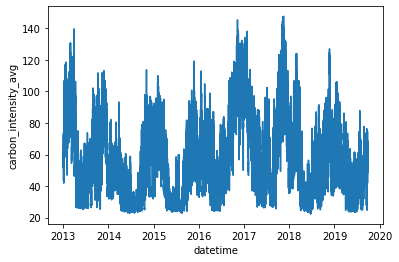

In [5]:
# Load the 50Mo CSV and plot the time series!
df = pd.read_csv("electricity_map_france.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
sns.lineplot(df, x="datetime", y="carbon_intensity_avg")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58948 entries, 0 to 58947
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   datetime                                      58948 non-null  datetime64[ns, UTC]
 1   timestamp                                     58948 non-null  int64              
 2   zone_name                                     58948 non-null  object             
 3   carbon_intensity_avg                          58870 non-null  float64            
 4   carbon_intensity_production_avg               58870 non-null  float64            
 5   carbon_intensity_discharge_avg                36841 non-null  float64            
 6   carbon_intensity_import_avg                   28591 non-null  float64            
 7   carbon_rate_avg                               42118 non-null  float64            
 8   total_production

### Your challenge
- Your goal is to predict `carbon_intensity_avg` up to 48h ahead.
- We have 6 years of data at hourly granularity! Enough to make proper `cross_validated` score of `rmpe` over the whole dataset!
- You have access to exogeneous forecast prefixed by `latest_forecasted_` 
    - e.g. you can use `latest_forecasted_price_avg(t+i)` when trying to predict `carbon_intensity_avg(t+i)`
    - for i in [1..48]

### Hints

- You can build a `SARMIAX` model with `exog` features
- Or, you can build your own "traditional" ML-based model, optimizing for the 48h ahead time horizon

## Your turn

In [24]:
#######################################
# ÉQUIVALENT D'UN AUTO ARIMA POUR SARIMAX ????
# À CHERCHER 
#######################################""

df_train = df[["carbon_intensity_avg", "latest_forecasted_temperature_avg", "latest_forecasted_price_avg", "datetime"]]
df_train.dropna(inplace=True)
df_train.set_index(keys="datetime", drop=True, inplace=True)




model = SARIMAX(endog=df_train["carbon_intensity_avg"], 
                exog=df_train[["latest_forecasted_temperature_avg", "latest_forecasted_price_avg"]],
                order=(3, 0, 0),
                seasonal_order=(0, 1, 2, 12))
model = model.fit(disp=False)
print(model.summary())


/tmp/ipykernel_37291/1898287456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)
/home/vincent/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                    carbon_intensity_avg   No. Observations:                24847
Model:             SARIMAX(3, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood              -69953.942
Date:                                 Wed, 08 Mar 2023   AIC                         139923.884
Time:                                         16:47:58   BIC                         139988.844
Sample:                                              0   HQIC                        139944.916
                                               - 24847                                         
Covariance Type:                                   opg                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latest_forecasted_temperatur

In [ ]:
# Cross-validation :

<AxesSubplot: xlabel='datetime'>

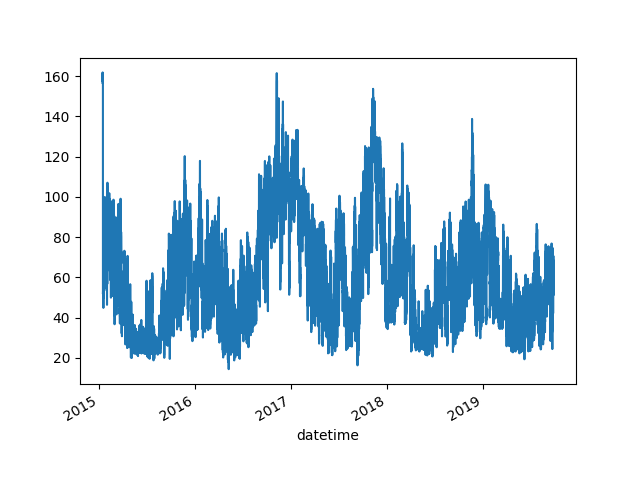

In [25]:
%matplotlib widget
y = model.predict()
y.plot()
# df.latest_forecasted_price_avg.plot()